In [62]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt


I=71 #Inputs 
J=3     #output
N=2   #features 
K=4   #Number of hidden Neurons
a=0.0001


In [63]:
dataset=np.loadtxt("data_ffnn_3classes.txt")
dataset=np.array(dataset)
X = dataset[:, [0, 1]]
Y=dataset[:,2]
#print(X.shape)
print(dataset)


[[1.9643 4.5957 1.    ]
 [2.2753 3.8589 1.    ]
 [2.9781 4.5651 1.    ]
 [2.932  3.5519 1.    ]
 [3.5772 2.856  1.    ]
 [4.015  3.1937 1.    ]
 [3.3814 3.4291 1.    ]
 [3.9113 4.1761 1.    ]
 [2.7822 4.0431 1.    ]
 [2.5518 4.6162 1.    ]
 [3.3698 3.9101 1.    ]
 [3.1048 3.0709 1.    ]
 [1.9182 4.0534 1.    ]
 [2.2638 4.3706 1.    ]
 [2.6555 3.5008 1.    ]
 [3.1855 4.2888 1.    ]
 [3.6579 3.8692 1.    ]
 [3.9113 3.4291 1.    ]
 [3.6002 3.1221 1.    ]
 [3.0357 3.3165 1.    ]
 [1.5841 3.3575 0.    ]
 [2.0103 3.2039 0.    ]
 [1.9527 2.7843 0.    ]
 [2.2753 2.7127 0.    ]
 [2.3099 2.9584 0.    ]
 [2.8283 2.6309 0.    ]
 [3.0473 2.2931 0.    ]
 [2.4827 2.0373 0.    ]
 [2.5057 2.3853 0.    ]
 [1.8721 2.0577 0.    ]
 [2.0103 2.3546 0.    ]
 [1.2269 2.3239 0.    ]
 [1.8951 2.9174 0.    ]
 [1.561  3.0709 0.    ]
 [1.5495 2.6923 0.    ]
 [1.6878 2.4057 0.    ]
 [1.4919 2.0271 0.    ]
 [0.962  2.682  0.    ]
 [1.1693 2.9276 0.    ]
 [0.8122 2.9992 0.    ]
 [0.9735 3.3881 0.    ]
 [1.25   3.1937 

In [64]:
bias  = np.ones((71,1))
Xbar = np.concatenate((bias, X), axis=1)
# Xbar.shape
print(Xbar[0:5])

[[1.     1.9643 4.5957]
 [1.     2.2753 3.8589]
 [1.     2.9781 4.5651]
 [1.     2.932  3.5519]
 [1.     3.5772 2.856 ]]


In [65]:
V=np.random.rand(2+1,4)  #aleatoire a revoir entre -1 et 1  # dimension(N+1,K)
# V.shape
print(V)

[[0.45416616 0.25597328 0.1473082  0.11836119]
 [0.10646898 0.7183203  0.14093073 0.69058805]
 [0.22582702 0.3241258  0.28061668 0.66540563]]


In [66]:
# Xbarbar.shape
Xbarbar = np.dot(Xbar, V)
print(Xbarbar[0:5])


[[1.70113642 3.15655475 1.71376849 4.53288794]
 [1.56785892 3.14113647 1.55083958 4.25738995]
 [1.80216437 3.87486961 1.84805719 5.21264469]
 [1.56844821 3.51335079 1.55723947 4.50661959]
 [1.47998897 3.75125191 1.45288683 4.48913122]]


In [67]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [68]:
F= sigmoid(Xbarbar)
print(F)

[[0.8456831  0.95916622 0.84732444 0.98936474]
 [0.82747817 0.95855805 0.82503496 0.98603847]
 [0.8584122  0.97966505 0.86389883 0.99458226]
 [0.82756228 0.97106526 0.82595688 0.98908476]
 [0.81457092 0.97705072 0.81044232 0.98889432]
 [0.83241813 0.98486046 0.8333212  0.99341385]
 [0.83041395 0.97804072 0.83006867 0.99129624]
 [0.85980539 0.98809854 0.86650616 0.99630936]
 [0.84069728 0.97248055 0.842104   0.9912509 ]
 [0.85424817 0.97301747 0.85843086 0.9929821 ]
 [0.84500525 0.98099627 0.84805873 0.99361442]
 [0.81430406 0.97015887 0.80947704 0.98669069]
 [0.82831928 0.9501531  0.82564813 0.98432983]
 [0.84319433 0.96438525 0.8445934  0.98994855]
 [0.82163581 0.96436606 0.81816028 0.98636881]
 [0.85344121 0.98081572 0.85811872 0.99435891]
 [0.84779221 0.98429002 0.8517737  0.99461667]
 [0.83821166 0.98488741 0.84034445 0.99394743]
 [0.82383226 0.97924558 0.82212338 0.99082522]
 [0.82146862 0.97101438 0.81843746 0.98812762]
 [0.79915764 0.92287859 0.78796913 0.96912423]
 [0.80086796 

In [69]:
bias2 = np.ones((71, 1))
Fbar = np.concatenate((bias2, F), axis=1)
Fbar.shape #=> 71,5
print(Fbar)


[[1.         0.8456831  0.95916622 0.84732444 0.98936474]
 [1.         0.82747817 0.95855805 0.82503496 0.98603847]
 [1.         0.8584122  0.97966505 0.86389883 0.99458226]
 [1.         0.82756228 0.97106526 0.82595688 0.98908476]
 [1.         0.81457092 0.97705072 0.81044232 0.98889432]
 [1.         0.83241813 0.98486046 0.8333212  0.99341385]
 [1.         0.83041395 0.97804072 0.83006867 0.99129624]
 [1.         0.85980539 0.98809854 0.86650616 0.99630936]
 [1.         0.84069728 0.97248055 0.842104   0.9912509 ]
 [1.         0.85424817 0.97301747 0.85843086 0.9929821 ]
 [1.         0.84500525 0.98099627 0.84805873 0.99361442]
 [1.         0.81430406 0.97015887 0.80947704 0.98669069]
 [1.         0.82831928 0.9501531  0.82564813 0.98432983]
 [1.         0.84319433 0.96438525 0.8445934  0.98994855]
 [1.         0.82163581 0.96436606 0.81816028 0.98636881]
 [1.         0.85344121 0.98081572 0.85811872 0.99435891]
 [1.         0.84779221 0.98429002 0.8517737  0.99461667]
 [1.         0

In [70]:
W = np.random.rand(4+1, 3)  # 3 neuron output 5,3
W


array([[0.99300498, 0.98781252, 0.52334118],
       [0.86783265, 0.76539833, 0.30675307],
       [0.14730639, 0.21500567, 0.76686199],
       [0.00630516, 0.17665889, 0.9876861 ],
       [0.40359495, 0.47147087, 0.41943398]])

In [71]:
Fbarbar=np.dot(Fbar,W)  #(71,5)*(5,3)
Fbarbar.shape
print(Fbarbar)


[[2.27285282 2.45746718 2.77016894]
 [2.2554814  2.43789652 2.74070799]
 [2.28912943 2.4770053  2.80835211]
 [2.25863206 2.44224912 2.75251337]
 [2.24806475 2.43076189 2.73771487]
 [2.26667188 2.45227384 2.77367134]
 [2.26305283 2.44770058 2.76372607]
 [2.29229428 2.48115977 2.81854642]
 [2.27121559 2.45648073 2.77448475]
 [2.28385623 2.4706685  2.79590521]
 [2.27720005 2.46377526 2.78920936]
 [2.24592249 2.42786638 2.73047023]
 [2.25428751 2.43603594 2.73440951]
 [2.27168019 2.45647719 2.77095525]
 [2.25135674 2.43361482 2.73671829]
 [2.28485836 2.4723215  2.80190704]
 [2.28053178 2.46774539 2.79667973]
 [2.2719633  2.45820628 2.78262976]
 [2.25727831 2.44129634 2.75458607]
 [2.25290259 2.43579447 2.74277682]
 [2.2185879  2.39402617 2.66095555]
 [2.22462531 2.4018347  2.67903299]
 [2.20474041 2.37859963 2.64034001]
 [2.21149061 2.38702749 2.65771615]
 [2.22281985 2.40022507 2.67952051]
 [2.22318265 2.40138211 2.68594065]
 [2.21510797 2.3923433  2.67308224]
 [2.18696236 2.3588712  2.61

In [72]:
G = sigmoid(Fbarbar) #=Y
G.shape
print(G[0:1])



[[0.90660363 0.9211058  0.94104236]]


In [73]:
yredefined =np.array(
    [[1 if val == 0 else 0, 1 if val == 1 else 0, 1 if val == 2 else 0] for val in Y])   #construire grace a Y yredefined qui correspond à une matrice avec 1 qui est la categorie de classification definie
    
yredefined



array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [74]:
def forward(V, W):
    Xbarbar = np.dot(Xbar, V)
    F = sigmoid(Xbarbar)
    bias2 = np.ones((71, 1))
    Fbar = np.concatenate((bias2, F), axis=1)
    Fbarbar = np.dot(Fbar, W)
    G = sigmoid(Fbarbar)
    return F, G, Fbar

F,G,Fbar= forward(V,W)
print(G)


[[0.90660363 0.9211058  0.94104236]
 [0.9051223  0.91967183 0.93938642]
 [0.90797273 0.922514   0.94312549]
 [0.90539252 0.91999279 0.94005514]
 [0.90448347 0.91914317 0.93921577]
 [0.90607895 0.92072757 0.94123638]
 [0.90577051 0.92039314 0.94068388]
 [0.90823684 0.92281045 0.94366985]
 [0.9064649  0.92103408 0.94128135]
 [0.90753116 0.92205982 0.94245415]
 [0.90697107 0.92156299 0.94208993]
 [0.90429824 0.91892772 0.93880086]
 [0.90501973 0.91953427 0.9390268 ]
 [0.90650429 0.92103383 0.94108597]
 [0.9047675  0.91935495 0.93915885]
 [0.90761523 0.92217853 0.94277879]
 [0.9072518  0.92184949 0.94249614]
 [0.90652828 0.92115949 0.94172992]
 [0.9052765  0.91992263 0.94017183]
 [0.90490061 0.9195164  0.93950411]
 [0.90190634 0.91637063 0.93468303]
 [0.90243918 0.9169671  0.93577803]
 [0.90067439 0.91518079 0.9334131 ]
 [0.90127664 0.91583272 0.93448498]
 [0.90228011 0.91684446 0.93580733]
 [0.90231209 0.91693264 0.93619192]
 [0.90159803 0.91624158 0.93541948]
 [0.8990726  0.91363678 0.93

In [61]:
G[0:5]
G.shape


(71, 3)

In [14]:
def error(G,yredefined):
    E=0
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            ypred=G[i][j]
            # ypred=G[i].argmax()
            E=E+(np.square(ypred-yredefined[i][j]))/2
    return E

In [15]:
def backward(G,Fbar,F):
    dW = 0
    dV = 0

    for k in range(K+1):
        for j in range(J):
            for i in range(I):
                dW += (G[i][j]-yredefined[i][j])*G[i][j]*(1-G[i][j])*Fbar[i][k]
            W[k][j] = W[k][j]-a*dW

    for k in range(K-1):
        for j in range(J):
            for i in range(I):
                dV += (G[i][j]-yredefined[i][j])*G[i][j] *(1-G[i][j])*F[i][k]*(1-F[i][k])*W[k][j]
        V[k][j] = V[k][j]-a*dV
    return V,W

  

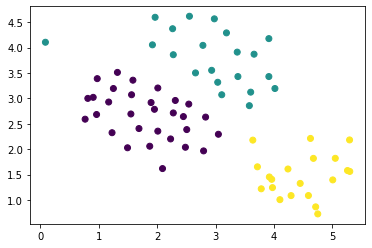

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')

In [17]:
# def sigmoid_derivative(z):
#     return np.exp(-z)/((1+np.exp(-z))**2)


In [18]:
# dW=0
# for k in range(K+1):
#     for j in range(J):
#         for i in range(I):
#             dW += (G[i][j]-yredefined[i][j])*G[i][j]*(1-G[i][j])*Fbar[i][k]
#         W[k][j] = W[k][j]-a*dW
    

    

In [19]:
# dV=0
# for k in range(K-1):
#     for j in range(J):
#         for i in range(I):
#             dV += (G[i][j]-yredefined[i][j])*G[i][j]*(1-G[i][j])*F[i][k]*(1-F[i][k])*W[j][k]
#     V[k][j] = V[k][j]-a*dV




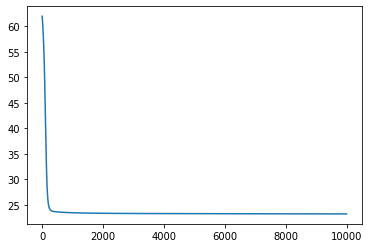

In [20]:
errors=[]
for itera in range(10000):  
   # print(E)
   F,G,Fbar= forward(V,W)
   E= error(G,yredefined)
   V,W=backward(G,Fbar,F)
   errors.append(E)
        
   # print(E) 
 
plt.plot(errors)



   



   

    
    
    